The following shows running a simple steady-state diffusion benchmark running on 2 cores.

In [8]:
import os

prj_name = "square_1e1_neumann"
data_dir = os.environ.get("OGS_DATA_DIR", "../../../Data")
prj_file = f"{data_dir}/EllipticPETSc/{prj_name}.prj"

from pathlib import Path

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
if not out_dir.exists():
    out_dir.mkdir(parents=True)

print(f"mpirun -np 2 ogs {prj_file} > out.txt")
! mpirun -np 2 ogs {prj_file} > out.txt

from datetime import datetime

print(datetime.now())

Text(0, 0.5, 'p')

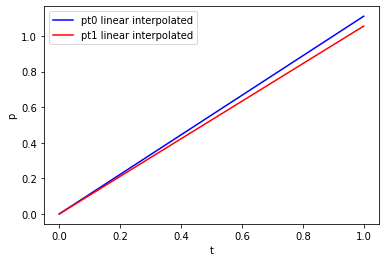

In [10]:
import vtuIO

pvdfile = vtuIO.PVDIO(f"{prj_name}.pvd", dim=2)
time = pvdfile.timesteps
points = {"pt0": (0.3, 0.5, 0.0), "pt1": (0.24, 0.21, 0.0)}
pressure_linear = pvdfile.read_time_series("pressure", points)

import matplotlib.pyplot as plt

plt.plot(time, pressure_linear["pt0"], "b-", label="pt0 linear interpolated")
plt.plot(time, pressure_linear["pt1"], "r-", label="pt1 linear interpolated")
plt.legend()
plt.xlabel("t")
plt.ylabel("p")